# Disney Wait Times R Recess 

## By: Kendall McCoy

## Data in Emerging Media and Technology

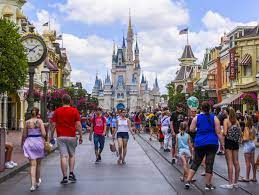

## Overview

#### Disney Wait Times with R

Disney is a place where thousands of people go every year with their families to enjoy the Disney experience. There are tons of family activites to do like carnival games, delicious food and lastly amusement park rides like rollercoasters. In this data report we will looking at two specific rides them being the Soarin' and the Spaceship Earth ride. With these two specific attractions we will examine the wait times for them on certain days from January 2020.

#### Analysis Plan

We will be using R's correlation and linear regression functions to determine  whether the Soarin' wait times correlate or predict the Spaceship Earth wait times.

#### Environment Setup

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
os.environ['R_HOME'] = r"C:\Users\kcmcc\anaconda3\envs\datainemat\Lib\R")
print(os.environ['R_HOME'])

C:\Users\kcmcc\anaconda3\envs\datainemat\Lib\R


In [5]:
import rpy2
print(rpy2.__version__)

3.4.2


In [ ]:
import rpy2.robjects as robjects

In [ ]:
r_cor = robjects.r["cor"]
r_lm = robjects.r["lm"]
r_predict = robjects.r["predict"]
r_plot = robjects.r["plot"]
r_summary = robjects.r["summary"]

#### The environment is setup and ready so know the data is loaded in and we can look at it

In [ ]:
waits = pd.read_csv(r"C:\Users\kcmcc\anaconda3\envs\datainemat\Lib\R")
waits.head()

This graph shows the wait times for both the Soarin' and Spaceship rides on the same days at the same times

In [ ]:
soarin_hist = plt.hist(waits['soarin_wait'])

This graph represents the varying wait times for the 'Soarin ride attraction

In [ ]:
spaceship_hist = plt.hist(waits['spaceship_wait'])

This graph represents the varying wait times for the Spaceship attraction

In [ ]:
waits = waits.replace(-999.0, np.nan)

In [ ]:
spaceship_hist = plt.hist(waits['spaceship_wait'])

In [ ]:
fig, ax0 = plt.subplots()
ax0 = plt.scatter(waits['spaceship_wait'], waits['soarin_wait'])
plt.show()

This scatterplot graph shows both the wait times for both attractions together to have a better visualization to compare the two amusement park rides

In [ ]:
soarin_r = robjects.FloatVector(waits['soarin_wait'])
spaceship_r = robjects.FloatVector(waits['spaceship_wait'])

In [ ]:
wait_cor = r_cor(soarin_r, spaceship_r, method = "pearson", use = "pairwise.complete.obs")

In [ ]:
wait_cor[0]

In [ ]:
wait_cor[0] ** 2

In [ ]:
simple_form = robjects.Formula("soarin ~ spaceship")
simple_form.environment['soarin'] = soarin_r
simple_form.environment['spaceship'] = spaceship_r

In [ ]:
wait_lm = r_lm(formula = simple_form)
type(wait_lm)

In [ ]:
wait_lm

In [ ]:
wait_lm[0]

In [ ]:
wait_lm.rx2("coefficients")

In [ ]:
wait_lm.rx2("rsquared")

In [ ]:
print(wait_lm.names)

In [ ]:
print(r_summary(wait_lm).names)

In [ ]:
r_summary(wait_lm).rx2('r.squared')

## Conclusion

Based off the data that was examined and worked with there, the conclusion is that the likeliness of being able to correlate the wait time for one ride for another is possible. The Soarin' ride can be used to predict the Spaceship ride. They are very similar in wait times for a difference here and there.